In [2]:
import numpy as np

In [3]:
twodee = np.array([[2,2,2,2],[3,3,3,3],[7,1,1,1]])

In [4]:
twodee

array([[2, 2, 2, 2],
       [3, 3, 3, 3],
       [7, 1, 1, 1]])

In [5]:
twodee[0]

array([2, 2, 2, 2])

In [6]:
twodee[1]

array([3, 3, 3, 3])

In [7]:
twodee[2][0]

7

In [8]:
twodee[2,0]

7

In [9]:
twodee[:,0]

array([2, 3, 7])

In [12]:
twodee[0,:]

array([2, 2, 2, 2])

In [10]:
twodee0 = np.array([[2,2,2,2],[3,3,3,3],[7,1,1,1]])
twodee1 = np.array([[1,1,1,1],[4,4,4,4],[8,6,6,6]])
threedee = np.array([twodee0,twodee1])
threedee

array([[[2, 2, 2, 2],
        [3, 3, 3, 3],
        [7, 1, 1, 1]],

       [[1, 1, 1, 1],
        [4, 4, 4, 4],
        [8, 6, 6, 6]]])

In [11]:
threedee[0][2][0]

7

In [12]:
threedee[0,2,0]

7

In [13]:
threedee[1,2,0]

8

In [14]:
threedee.shape

(2, 3, 4)

In [15]:
twodee.shape

(3, 4)

In [19]:
import xarray as xr 
import pandas as pd

In [20]:
data = xr.DataArray(np.random.randn(2, 3), dims=("x", "y"), coords={"x": [10, 20]})

In [22]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[-0.73655648,  0.08783401, -1.00868494],
       [-0.05329145,  0.0889927 ,  2.57144852]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [23]:
# like in pandas, values is a numpy array that you can modify in-place
data.values

array([[-0.73655648,  0.08783401, -1.00868494],
       [-0.05329145,  0.0889927 ,  2.57144852]])

In [24]:
data.dims

('x', 'y')

In [25]:
data.coords

Coordinates:
  * x        (x) int64 10 20

In [26]:
# you can use this dictionary to store arbitrary metadata
data.attrs

{}

In [28]:
# positional and by integer label, like numpy
#the returned object is always another DataArray
data[0, :]

<xarray.DataArray (y: 3)>
array([-0.73655648,  0.08783401, -1.00868494])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [29]:
# loc or "location": positional and coordinate label, like pandas
data.loc[10]

<xarray.DataArray (y: 3)>
array([-0.73655648,  0.08783401, -1.00868494])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [31]:
# isel or "integer select":  by dimension name and integer label
data.isel(x=0)

<xarray.DataArray (y: 3)>
array([-0.73655648,  0.08783401, -1.00868494])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [32]:
# sel or "select": by dimension name and coordinate label
data.sel(x=10)


<xarray.DataArray (y: 3)>
array([-0.73655648,  0.08783401, -1.00868494])
Coordinates:
    x        int64 10
Dimensions without coordinates: y

In [33]:
#attributes
data.attrs["long_name"] = "random velocity"
data.attrs["units"] = "metres/sec"
data.attrs["description"] = "A random variable created as an example."
data.attrs["random_attribute"] = 123
data.attrs



{'long_name': 'random velocity',
 'units': 'metres/sec',
 'description': 'A random variable created as an example.',
 'random_attribute': 123}

In [34]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[-0.73655648,  0.08783401, -1.00868494],
       [-0.05329145,  0.0889927 ,  2.57144852]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [35]:
data.x.attrs["units"] = "x units"
data.x

<xarray.DataArray 'x' (x: 2)>
array([10, 20])
Coordinates:
  * x        (x) int64 10 20
Attributes:
    units:    x units

In [38]:
data

<xarray.DataArray (x: 2, y: 3)>
array([[-0.73655648,  0.08783401, -1.00868494],
       [-0.05329145,  0.0889927 ,  2.57144852]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [46]:
data + 10

<xarray.DataArray (x: 2, y: 3)>
array([[ 9.26344352, 10.08783401,  8.99131506],
       [ 9.94670855, 10.0889927 , 12.57144852]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y

In [47]:
np.sin(data)

<xarray.DataArray (x: 2, y: 3)>
array([[-0.67174099,  0.08772111, -0.84613169],
       [-0.05326623,  0.08887528,  0.53975339]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [48]:
data.T

<xarray.DataArray (y: 3, x: 2)>
array([[-0.73655648, -0.05329145],
       [ 0.08783401,  0.0889927 ],
       [-1.00868494,  2.57144852]])
Coordinates:
  * x        (x) int64 10 20
Dimensions without coordinates: y
Attributes:
    long_name:         random velocity
    units:             metres/sec
    description:       A random variable created as an example.
    random_attribute:  123

In [49]:
data.sum()

<xarray.DataArray ()>
array(0.94974234)

In [50]:
data.mean(dim="x")

<xarray.DataArray (y: 3)>
array([-0.39492397,  0.08841335,  0.78138179])
Dimensions without coordinates: y

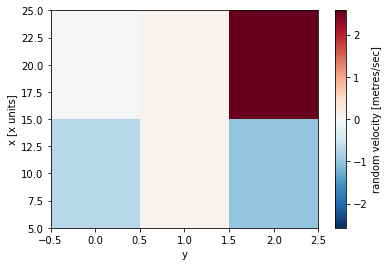

In [51]:
data.plot()

Text(0.5, 1.0, 'random stuff')

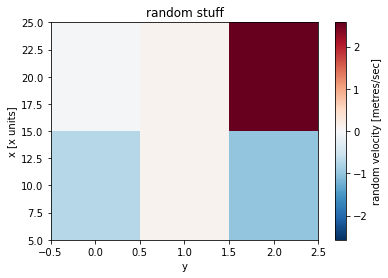

In [54]:
import matplotlib.pyplot as plt

fig,ax1 = plt.subplots()
data.plot(ax=ax1)

ax1.set_title('random stuff')